In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fig 2 (a)

In [2]:
# parameters :
v0_list = np.array([0,5,10,20,40])
D0 = 1
L = 70
L_half = 35
a = 1.66
N = 5000
T = 100
dt = 5e-4
steps = int(T/dt)
sigma_eff = 1.10688
tau_r = sigma_eff**2 / (3*D0)
A = (L**2) - (np.pi * (a**2))
rho_bar = N/A

In [3]:
def initialize_position(N):
    x = np.random.uniform(-L_half,L_half,N)
    y = np.random.uniform(-L_half,L_half,N)

    r = np.hypot(x,y)
    mask = r < a
    while np.sum(mask) > 0:
        x[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
        y[mask] = np.random.uniform(-L_half,L_half,np.sum(mask))
        r = np.hypot(x,y)
        mask = r < a

    return x , y

In [4]:
r_values = np.linspace(a,L_half,51)
centres = 0.5*(r_values[:-1] + r_values[1:])
dr = r_values[1] - r_values[0]
areas = 2*np.pi*centres*dr

1.0222141387570136 [0.09635125 0.25293851 0.37011998 0.44733207 0.53257024 0.62119665
 0.69479651 0.7344454  0.76896519 0.80989285 0.85051258 0.88164693
 0.90375404 0.91948606 0.94254438 0.95874244 0.97693385 1.00326043
 1.005665   1.01795879 1.01242057 1.01846046 1.03698935 1.04042258
 1.04788692 1.04367156 1.03307151 1.02428246 1.03474777 1.04719537
 1.04894309 1.05911508 1.07676524 1.07777876 1.07424968 1.06238198
 1.06390159 1.06876625 1.05189708 1.04352511 1.05493575 1.05322242
 1.04707745 1.03798176 1.04286855 1.04829759 1.0514979  1.0566915
 1.04836499 1.03945512]
1.0222141387570136 [0.23973687 0.40804946 0.49551104 0.54844495 0.59853937 0.6371718
 0.67731337 0.71826449 0.75342201 0.78403965 0.81611764 0.8328629
 0.83895605 0.86586243 0.88253004 0.89677255 0.90702916 0.921503
 0.92216425 0.93994931 0.95181284 0.97526786 0.99035054 0.9975883
 1.01317992 1.02866856 1.025659   1.03027286 1.03402223 1.03159262
 1.040049   1.04604633 1.04764386 1.04577717 1.04190963 1.0518023
 1.0609

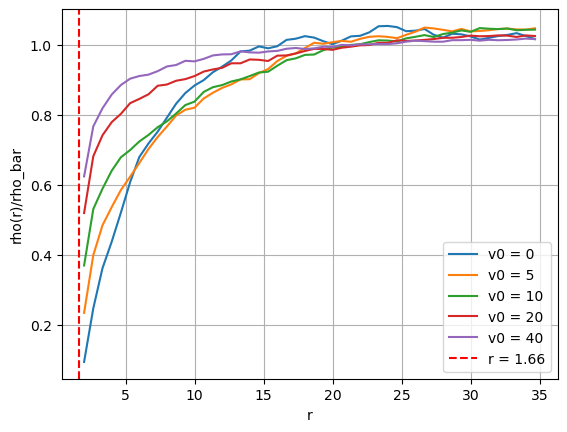

In [5]:
for v in v0_list:
    x , y = initialize_position(N)
    phi = np.random.uniform(0,2*np.pi,N)
    accum = np.zeros(len(r_values) - 1)
    for step in range(steps):
        x += v*np.cos(phi)*dt + np.sqrt(2*D0*dt)*np.random.randn(N)
        y += v*np.sin(phi)*dt + np.sqrt(2*D0*dt)*np.random.randn(N)
        x = (x + L_half) % L - L_half
        y = (y + L_half) % L - L_half
        phi += np.sqrt(2*dt/tau_r) * np.random.randn(N)
        r = np.hypot(x, y)
        
        mask = r < a
        while mask.any():
            x[mask] = np.random.uniform(-L_half,L_half, mask.sum())
            y[mask] = np.random.uniform(-L_half,L_half, mask.sum())
            r = np.hypot(x, y)
            mask = r < a
        
        if step > 0.2*steps and step % 50 == 0:
            r = np.hypot(x,y)
            hist , _ = np.histogram(r , bins = r_values)
            accum += hist

    
    sample_size = (0.8*steps/50)
    rho_r = accum/(areas * sample_size)
    print(rho_bar , rho_r)
    rho_r_norm = rho_r / rho_bar 
    plt.plot(centres , rho_r_norm , label = f'v0 = {v}')
    

plt.axvline(a , color = 'r' , ls = '--' , label = 'r = 1.66')
plt.xlabel('r')
plt.ylabel('rho(r)/rho_bar')
plt.grid(True)

plt.legend()

# Fig 2 (b)

In [6]:
D_values = np.array([1,2,3])
L = 70
v0 = 10
N = 3000
a = 1.66
L_half = L/2
r_values = np.linspace(a,L_half,50)
T = 10
dt = 0.001
steps = int(T/dt)
A = (L**2) - (np.pi*(a**2))
rho_bar = N/A

In [7]:
r_values = np.linspace(a,L_half,51)
centres = 0.5*(r_values[:-1] + r_values[1:])
dr = r_values[1] - r_values[0]
areas = 2*np.pi*centres*dr

0.6133284832542081 [0.24995197 0.3942263  0.41475678 0.42955234 0.44395524 0.49283543
 0.52038811 0.5034559  0.51342384 0.51519807 0.50929309 0.53509716
 0.52835403 0.52133499 0.52857386 0.55627395 0.55996799 0.57940889
 0.59699735 0.58653358 0.59410755 0.60776467 0.59624616 0.61152464
 0.61920534 0.61242927 0.60943915 0.63066968 0.64013427 0.63229239
 0.60125809 0.61582083 0.62168658 0.60403949 0.59012877 0.59326307
 0.60237626 0.60376079 0.59645407 0.58693792 0.59722378 0.62077367
 0.59782559 0.61780864 0.62256261 0.63229316 0.6573817  0.65550927
 0.64598808 0.65486366]
0.6133284832542081 [0.14967184 0.22543239 0.31611192 0.40826148 0.36809555 0.38894796
 0.42930152 0.42417503 0.44950033 0.46033815 0.47432979 0.4802441
 0.49387669 0.49642956 0.49947201 0.51573174 0.51908668 0.54102039
 0.53570946 0.54665133 0.56870835 0.58277144 0.5879202  0.60239998
 0.60958984 0.58868985 0.60480874 0.60530563 0.60021161 0.61774568
 0.61692362 0.62905084 0.61605987 0.62741284 0.62962391 0.63796097
 

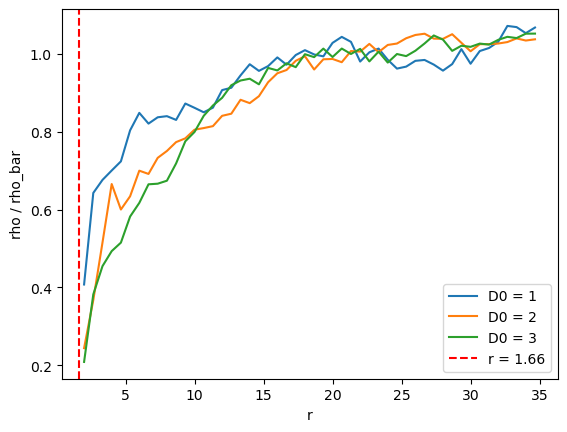

In [8]:
for D0 in D_values:
    x , y = initialize_position(N)
    phi = np.random.uniform(0,2*np.pi,N)
    accum = np.zeros(len(r_values) - 1)
    tau_r = sigma_eff**2 / (3 * D0)

    for step in range(steps):
        x += v0*np.cos(phi)*dt + np.sqrt(2*D0*dt)*np.random.randn(N)
        y += v0*np.sin(phi)*dt + np.sqrt(2*D0*dt)*np.random.randn(N)
        x = (x + L_half) % L - L_half
        y = (y + L_half) % L - L_half
        phi += np.sqrt(2*dt/tau_r) * np.random.randn(N)
        
        r = np.hypot(x,y)

        mask = r < a
        while mask.any():
            x[mask] = np.random.uniform(-L_half,L_half, mask.sum())
            y[mask] = np.random.uniform(-L_half,L_half, mask.sum())
            r = np.hypot(x, y)
            mask = r < a

        
        if step > 0.2*steps and step % 50 == 0:
            r = np.hypot(x,y)
            hist , _ = np.histogram(r , bins = r_values)
            accum += hist

    
    sample_size = (0.8*steps/50)
    rho_r = accum/(areas * sample_size)
    print(rho_bar , rho_r)
    rho_r_norm = rho_r / rho_bar 
    plt.plot(centres , rho_r_norm , label = f'D0 = {D0}')
    

plt.axvline(a , color = 'r' , ls = '--' , label = 'r = 1.66')
plt.xlabel('r')
plt.ylabel('rho / rho_bar')
plt.legend()